# Disease prediction: Diabetes Dataset Code

### Aim: To obtain a good model with high accuracy which can predict if the patient is "Diabetic" or "NOT

#### Algorithm Primarily Used: Binary Logistic Regression
The above method is typically for determining the likelihood that an instance belongs to a specific class. When the estimated probability exceeds 50%, the model indicates that the instance is either part of the positive class (designated as '1', "Daiabetic") or it is not (designated as '0', "Not Diabetic"), indicating that it belongs to the negative class.

In [1]:
# Importing necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset into dataframe "df":
df = pd.read_csv('diabetes.csv')

### Basic exploration of data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Getting Statistical information about the dataset:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Checking the null values:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Displaying all rows in the DataFrame where at least one element in the row has a value equal to zero:
pd.set_option('display.max_rows', None)
df[(df == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


From the information above, it is evident that the data has been corrupted because a small percentage of the values in the columns for blood pressure, BMI, skin thickness, and insulin have values of 0, which is practically incorrect.

### Exploratory Data Analysis

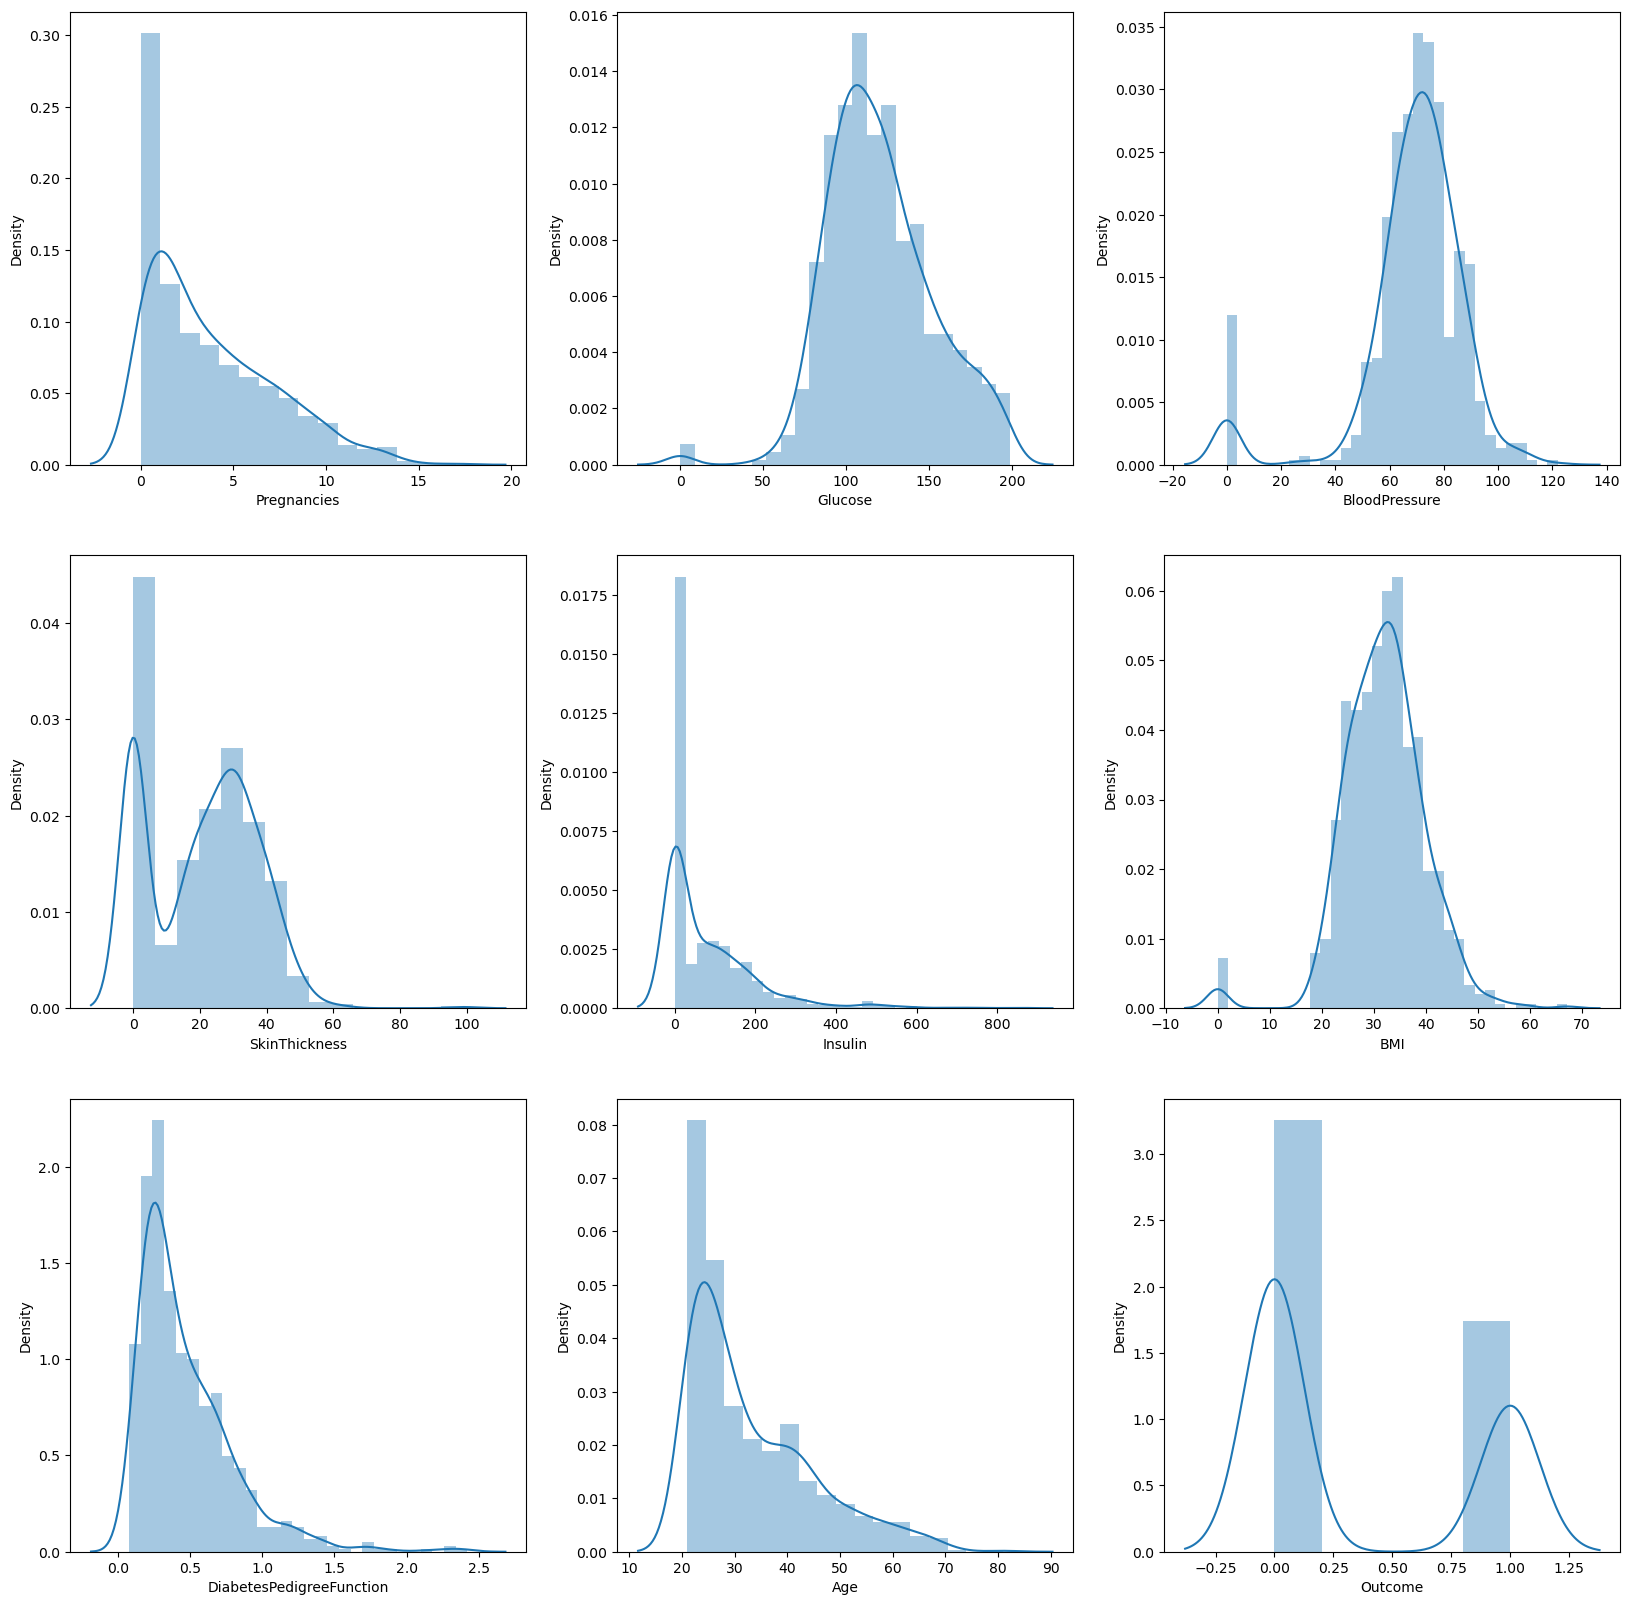

In [10]:
# Visualing the distribution of data for every columns, expecting skewness:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :   
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 10)
    plotnumber+=1
plt.show()

In [11]:
# Handling incorrect values (Replacing zero values with the mean of their columns):
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI']  = df['BMI'].replace(0, df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125,96.000000,20.536458,79.799479,31.992578,0.232,54,1


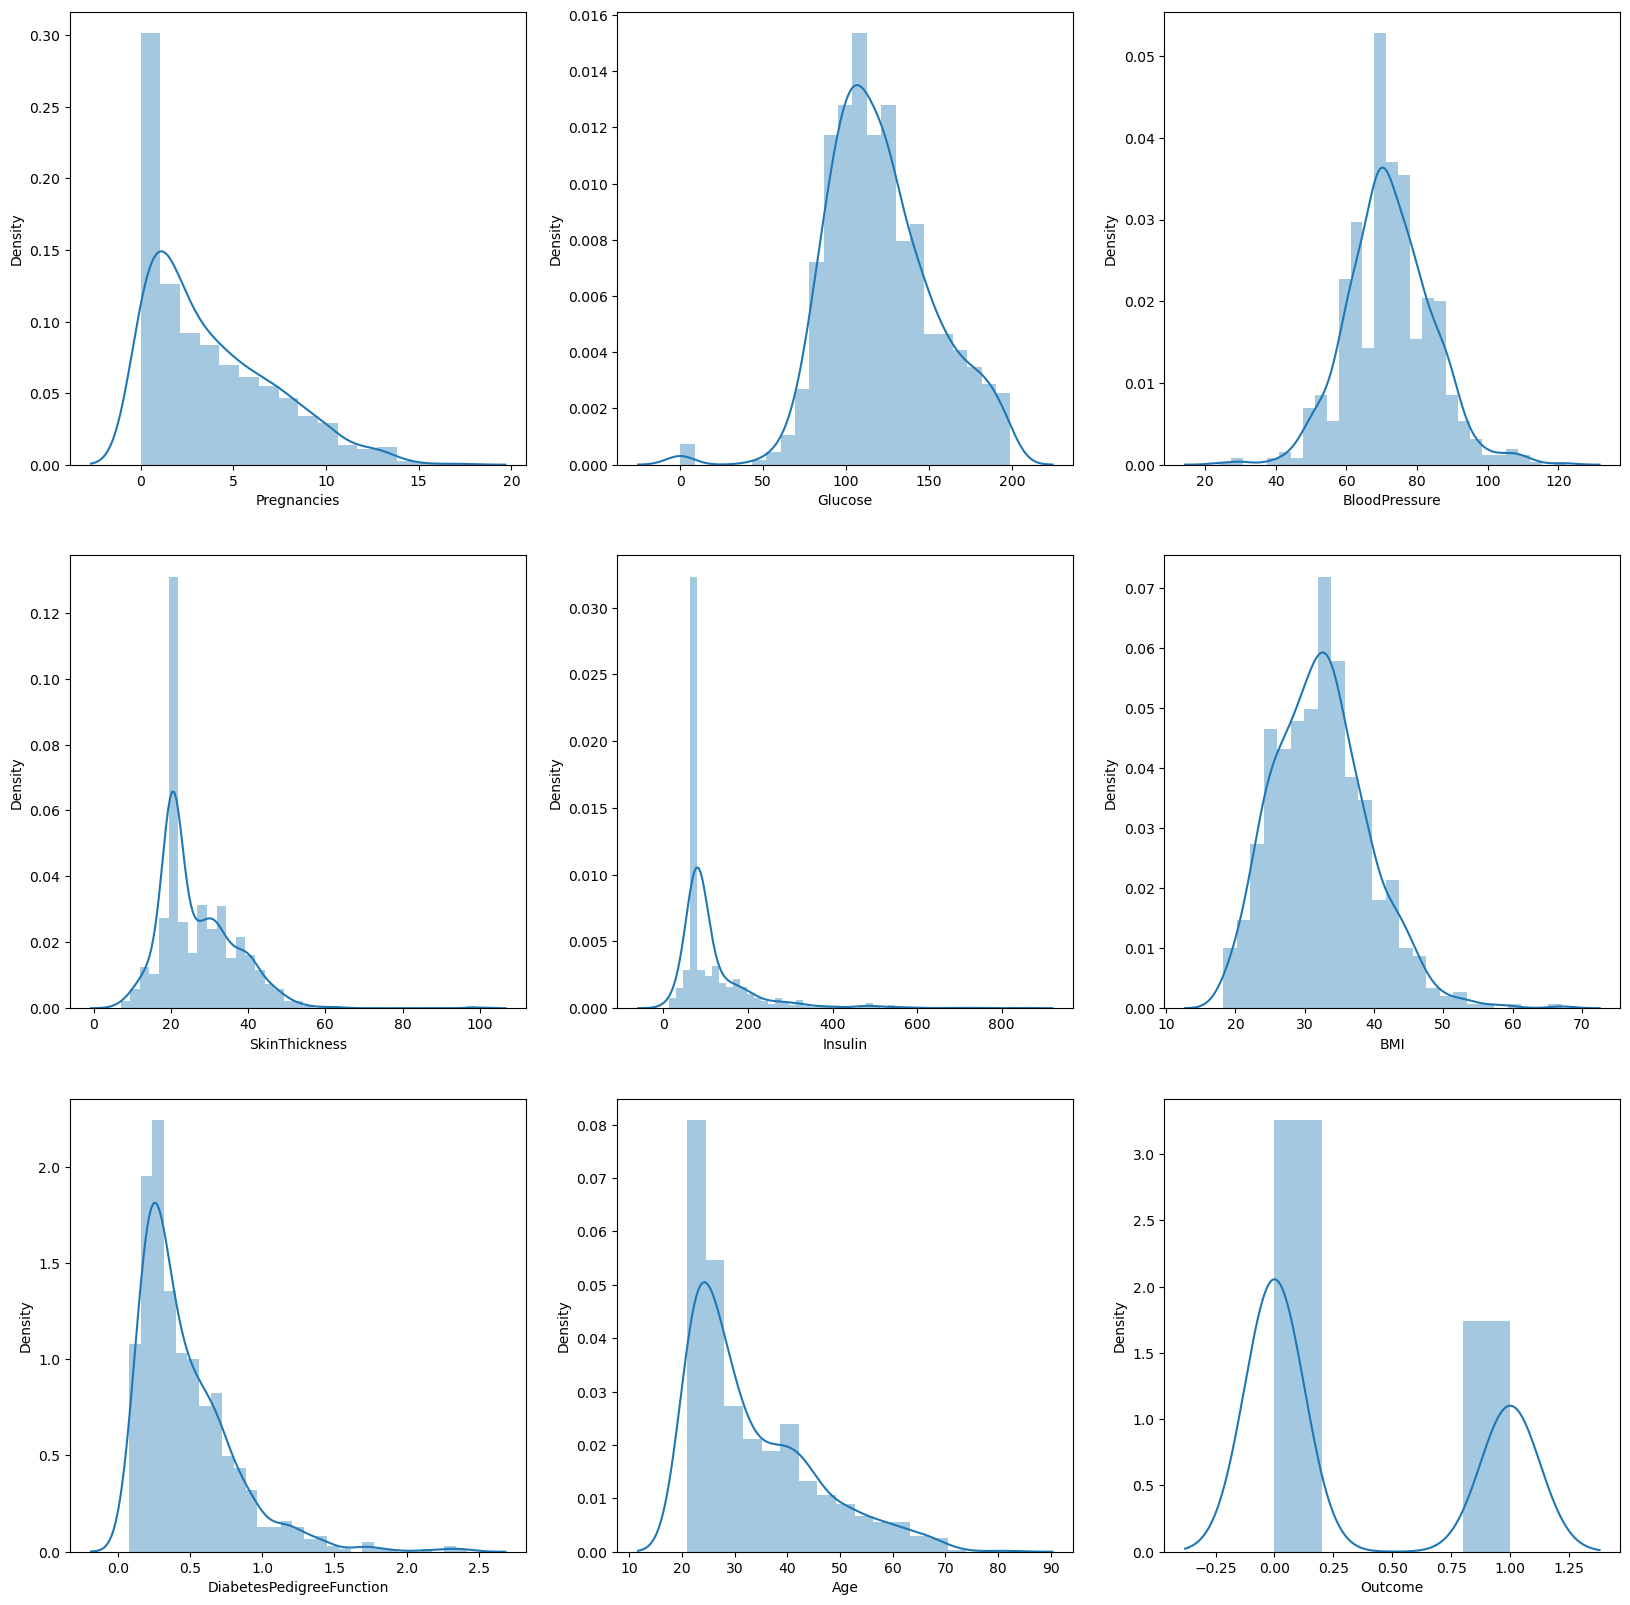

In [13]:
# Visualing the distribution of data for every columns:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :   
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 10)
    plotnumber+=1
plt.show()

### Univariate Analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

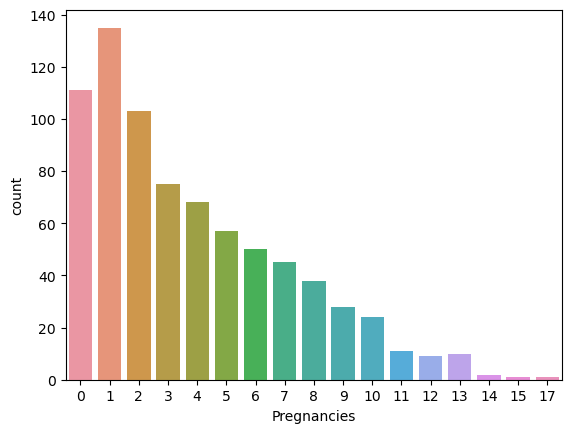

In [14]:
# Visulasing the patients who have conceived 0 or more times:
sns.countplot(x = 'Pregnancies', data = df)

Patients who are conceived 0 or 1 time are the heighest compared to the other patients

In [15]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### BiVariate Analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

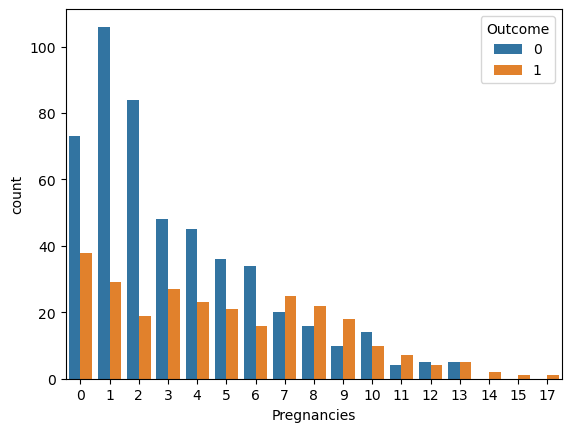

In [16]:
# Analyzing how preganancies impact the patient with diabetes:
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = df)

1) The patient will get diabetes if she anticipates one. However, upon examination of this data, we discovered that 
the likelihood of developing diabetes also rises with the number of pregnancies.

2) All pregnant women are diabetic from the ages of 14 to 17.

<Axes: xlabel='Glucose', ylabel='Count'>

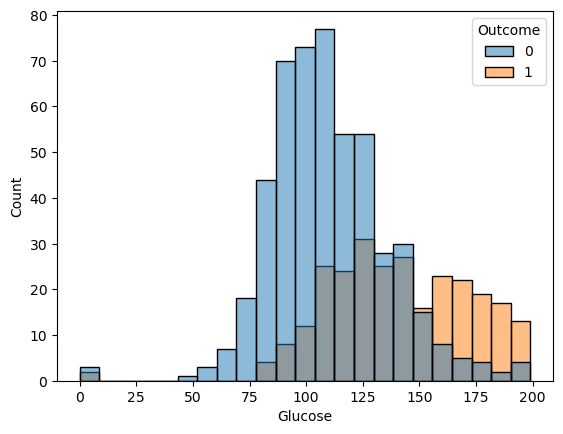

In [17]:
# Analysing relationship between Glucose and Outcome:
sns.histplot(x = 'Glucose', hue = 'Outcome', data = df, alpha = 0.5)

1) Based on the available data, an individual with a glucose range of up to 100 may be deemed to have a lower risk of developing diabetes.

2) If a person's blood sugar is between 125 and 150, they are neither at risk nor not, and more patient features need to be examined.

3) A person's risk of developing diabetes increases if their blood glucose level is greater than 150.

<Axes: xlabel='BloodPressure', ylabel='Count'>

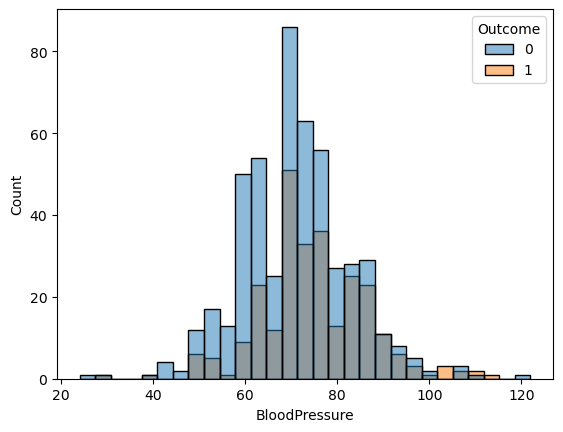

In [18]:
# Analysing relationship between Insulin and Outcome:
sns.histplot(x = 'BloodPressure', hue = 'Outcome', data = df)

More patients have BP between 60 to 80

In [19]:
# Coorelation with different parameters:
tc = df.corr()
tc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.218579,0.145378,0.390835,0.218814,0.137337,0.263514,0.466581
BloodPressure,0.208984,0.218579,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.145378,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.390835,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.218814,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137337,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

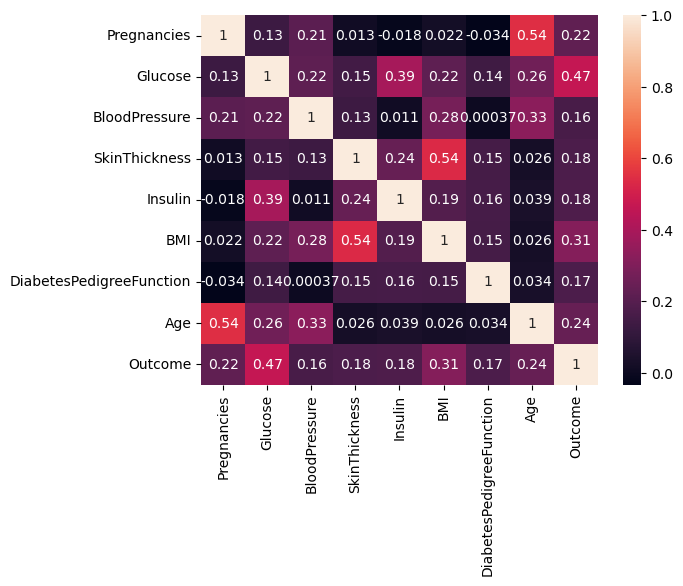

In [20]:
# Visualising Data Correlation:
sns.heatmap(df.corr(),annot=True)

## Model Creation using Binary Logistic Regression Classification

In [270]:
# Set of Functions for Binary Logistic Regression:

def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

def model_function(data_matrix, weights):
    return data_matrix @ weights

# Function to standardise the input data:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

# Defining the Sigmoid function:
def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))

# Function to predict binary class values using a threshold (>0.5):
def binary_prediction_function(data_matrix, weights):
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 0.5

# Performing gradient descent to obtain optimal weights that minimises the cost function:
def gradient_descent(objective, gradient, initial_weights, step_size=1, no_of_iterations=100, print_output=10):
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))

    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, m=no_of_iterations, 
                                                               o=objective_values[counter]))

    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+1,
                                                                       m=no_of_iterations, 
                                                                       o=objective_values[counter]))
    return weights, objective_values

def binary_logistic_regression_cost_function(data_matrix, data_labels, weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) - data_labels * regression_outputs)

def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

# Function to calculate accuracy:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels 
    return np.mean(equal_labels)

# Function to split the data into training and validation set:
def data_split(data_matrix, validation_ratio):
    data_size = len(data_matrix)
    validation_size = int(round(data_size * validation_ratio, 0))
    rows_indexes = np.random.choice(data_size, validation_size, replace=False)
    validation_data = data_matrix[rows_indexes, :]
    training_data = np.delete(data_matrix, obj=rows_indexes, axis=0)
    return training_data, validation_data

# Extracting features and target variable:
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target_variable = df['Outcome']

# Combining the features and target variable into a single matrix:
data_matrix = np.c_[features, target_variable]

# Using the data_split function to get Training and Testing sets: (Training = 80% and Testing = 20%):
training_data, validation_data = data_split(data_matrix, validation_ratio=0.2)

# Separating features and target variable in training and validation sets:
X_train = training_data[:, :-1]
y_train = training_data[:, -1]

X_val = validation_data[:, :-1]
y_val = validation_data[:, -1]

# Standardizing the data after splitting:
X_train_std, _, _ = standardise(X_train)
X_val_std, _, _ = standardise(X_val)

# Preparing the input matrices:
X_train = linear_regression_data(X_train_std)
X_val = linear_regression_data(X_val_std)

# Initializing the weights:
initial_weights = np.zeros(X_train.shape[1])

# Training the model:
trained_weights, _ = gradient_descent(
    objective=lambda w: binary_logistic_regression_cost_function(X_train, y_train, w),
    gradient=lambda w: binary_logistic_regression_gradient(X_train, y_train, w),
    initial_weights=initial_weights,
#Checking with different step size and increasing number of iterations:
    #step_size=0.01,
    #no_of_iterations=1000,
    #print_output=100
)
print('-----------')
# Testing the model using binary_prediction_function:
predicted_labels = binary_prediction_function(X_val, trained_weights)
print("Predicted Labels", predicted_labels)

print('-----------')

# Evaluating the model on the validation set:
accuracy = classification_accuracy(predicted_labels, y_val)
print("Classification Accuracy on Testing Set: {:.2%}".format(accuracy))


Iteration 10/100, objective = 0.49892937502881135.
Iteration 20/100, objective = 0.4899594233608045.
Iteration 30/100, objective = 0.4884497037114889.
Iteration 40/100, objective = 0.4881326055121417.
Iteration 50/100, objective = 0.4880606532258276.
Iteration 60/100, objective = 0.4880437453428595.
Iteration 70/100, objective = 0.4880397011186273.
Iteration 80/100, objective = 0.488038724459564.
Iteration 90/100, objective = 0.4880384873124431.
Iteration 100/100, objective = 0.48803842954195065.
Iteration completed after 100/100, objective = 0.48803842954195065.
-----------
Predicted Labels [False False False False  True  True  True False False False False False
 False False False False  True  True False False False False False  True
 False False False False False False  True  True False False False  True
 False False False  True False False False False False False False False
  True  True False False  True False  True False False  True False  True
 False False False False  True False

## Model Creation using KNN Classification 

In [271]:
# Set of functions for KNN Classification:

def pairwise_distances(from_data, to_data):
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2, axis=2))

def nearest_neighbour_classification(testing_inputs, training_inputs, training_outputs, no_of_neighbours):
    distances = pairwise_distances(testing_inputs, training_inputs)
    
    no_of_classes = 2
    sorted_indices = np.argsort(distances, axis=1)
    
    no_of_inputs = len(testing_inputs)
    no_of_points = len(training_inputs)
    
    new_array_to_sort = np.broadcast_to(training_outputs, (no_of_inputs, no_of_points))
    sorted_labels = np.take_along_axis(new_array_to_sort, sorted_indices, 1)
    
    predicted_labels = np.zeros(no_of_inputs, int)
    for id_input in range(no_of_inputs):
        probability_labels = np.zeros(no_of_classes, float)
        
        for id_neighbor in range(0, no_of_neighbours):
            probability_labels[sorted_labels[id_input][id_neighbor]] += 1. / no_of_neighbours

        predicted_labels[id_input] = np.argmax(probability_labels)

    return predicted_labels

# Function to calculate the accuracy:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels
    return np.mean(equal_labels)

# Function to perform KFold splits:
def KFold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split

# Function to perform Cross-Validation:
def KFold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation,
                                missclassification_evaluation, knn):
    data_size = len(data_inputs)
    indexes_split = KFold_split(data_size, K)

    average_accuracy = 0
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])

        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes], knn)

        accuracy = missclassification_evaluation(predicted_labels,
                                                data_outputs[indexes_split[i]])
        average_accuracy += accuracy / K

    error = 1. - average_accuracy
    return error

# Function to obtain optimal "K_value" using grid_search function:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]


# Extracting the features and the target variables:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Splitting the dataset for Training and Testing:(Training = 80% and Testing = 20%):
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index, :], X[split_index:, :]
y_train, y_test = y[:split_index], y[split_index:]

X_train_std, _, _ = standardise(X_train)
X_test_std, _, _ = standardise(X_test)

# Performing Grid Search for random K Values:(K = 5):
k_values = [2,4,6,8,10]
optimal_k = grid_search(lambda knn: KFold_cross_validation_knn(X_train, y_train, 5,
                                                               nearest_neighbour_classification,
                                                               classification_accuracy, knn), k_values)

print("Optimal K:", optimal_k)

# Testing the model using KNN:
knn_neighbors = optimal_k
predicted_labels_knn = nearest_neighbour_classification(X_test, X_train, y_train, knn_neighbors)

# Evaluating the KNN model:
accuracy_knn = classification_accuracy(predicted_labels_knn, y_test)
print("KNN Classification Accuracy on Testing Set: {:.2%}".format(accuracy_knn))


Optimal K: 4
KNN Classification Accuracy on Testing Set: 69.48%


## Model Creation using Random Forest Classifier

In [272]:
# Importing necessary libraries using Scikit Learn:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
model = RandomForestClassifier()

# Extracting features and target variables:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Splitting the dataset using train_test_split function:(Training = 80% and Testing = 20%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Fiting the RandomForestClassifier on the Training dataset:
model.fit(X_train, y_train)

# Make predictions on the Test set:
y_pred = model.predict(X_test)

# Calculating the accuracy for the model:
accuracy_Rf = accuracy_score(y_test, y_pred)
print("Random Forest Classification Accuracy rate on Testing Set: {:.2%}".format(accuracy_Rf))

Random Forest Classification Accuracy rate on Testing Set: 75.32%


## Prediction Summary

The Accuracy rates predicted by different classification models:

1. K Nearest Neighbors -                         69.48% 
2. Logistic Regression Classification  -         75-85%
3. Random Forest Classification       -          70-75%


## Comparision

### Accuracy of KNN Classification on Testing Set: 69.48%

Pros: Clear and easy to comprehend.
      It is non-parametric, complex decision boundaries can be captured.

Cons: May be costly to compute, particularly for big datasets.
      Sensitive to elements that are unnecessary or redundant.

### Accuracy of Random Forest Classification on Testing Set: 70-75%

Pros: Array approach that combines several decision trees for increased precision.
      Effectively manages interactions and non-linearity.

Cons: Intricacy and possible overfitting (although this is lessened by ensemble techniques).
      Less comprehensible than one decision tree alone.

### Accuracy of Logistic Regression Classification on Testing Set: 75-85%

Pros: Easy to understand and simple.
      Effective with big datasets.

Cons: Presupposes a linear relationship between the target variable's log-odds and characteristics.
      May not capture complex non-linear relationships.

## Considerations for Choosing a Model

Model Complexity: Random Forest has a higher level of complexity than KNN. The decision is based on how complicated the issue is.

Interpretability: Random Forest may offer greater accuracy, but logistic regression is easier to understand.

Computational Resources: KNN can be costly to compute, particularly for huge datasets.
In actuality, the optimal model selection is determined by the particulars of your data, the issue at hand, and the trade-off between interpretability and model complexity. In addition, it is advisable to take into account additional metrics like F1 score, precision, and recall for a more thorough analysis.

## Conclusion

On the same test set, the Binary Logistic Regression model yielded a greater accuracy of about (72-85)%. The logistic regression model performs well on the test set based on the selected evaluation metric (accuracy), and it is trained using a gradient descent optimization approach to determine the ideal weights for the linear combination of features.

This indicates that the KNN model obtained an accuracy of roughly 69.48% on the test set by utilizing the optimal value of K, which in this case is 4. The percentage of accurately predicted cases among all the instances in the test set is represented by this accuracy. Cross-validation is used to establish the optimal K, which represents the number of nearest neighbors taken into account while generating predictions.


Random forest ranks second best for diabetes prediction on the same dataset, requiring longer time for training data and having an accuracy range of 70–75%.


In conclusion, based on this particular data set, the Binary Logistic Regression model seems to perform better than the KNN model and Random Forest Classifier because of its higher classification accuracy. 
KNN model works poorer on larger dataset but work well on smaller datasets and whereas Random Forest Classification model works good on testing data, but takes a bit more time for training the dataset.